In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
results_path = '/home/user/Desktop/results_cluster/run_3/case_1/graphs/results.csv'
case_name = 'case 1'
df = pd.read_csv(results_path)
df_seeks = pd.read_csv(results_path)
df.head()

,Unnamed: 0,case_name,run_ref,model,process_time,preprocess_time,read_time,write_time,outfile_openings,outfile_seeks,infile_openings,infile_seeks,max_voxels,success
0,0,case 1_0,0,keep,344.609428,0.046494,248.035114,51.531926,32,0,64,0,1339843750,True
1,0,case 1_2,2,keep,353.606750,0.730150,233.167324,43.201751,343,0,1000,0,5464000000,True
2,0,case 1_6,6,keep,345.300527,0.886776,237.140795,68.625658,700,0,400,0,566562500,True
3,0,case 1_6,6,keep,349.540469,0.889951,237.432919,70.203476,700,0,400,0,566562500,True
4,0,case 1_5,5,keep,331.543036,0.295608,227.910237,45.034036,196,0,400,0,5337500000,True


In [3]:
df = df.drop(columns=['max_voxels', 'success', 'case_name', 'Unnamed: 0'])
df.head()

,run_ref,model,process_time,preprocess_time,read_time,write_time,outfile_openings,outfile_seeks,infile_openings,infile_seeks
0,0,keep,344.609428,0.046494,248.035114,51.531926,32,0,64,0
1,2,keep,353.606750,0.730150,233.167324,43.201751,343,0,1000,0
2,6,keep,345.300527,0.886776,237.140795,68.625658,700,0,400,0
3,6,keep,349.540469,0.889951,237.432919,70.203476,700,0,400,0
4,5,keep,331.543036,0.295608,227.910237,45.034036,196,0,400,0


In [4]:
df['nb_seeks'] = df['outfile_openings'] + df['outfile_seeks'] + df['infile_openings'] + df['infile_seeks']
df.head()

,run_ref,model,process_time,preprocess_time,read_time,write_time,outfile_openings,outfile_seeks,infile_openings,infile_seeks,nb_seeks
0,0,keep,344.609428,0.046494,248.035114,51.531926,32,0,64,0,96
1,2,keep,353.606750,0.730150,233.167324,43.201751,343,0,1000,0,1343
2,6,keep,345.300527,0.886776,237.140795,68.625658,700,0,400,0,1100
3,6,keep,349.540469,0.889951,237.432919,70.203476,700,0,400,0,1100
4,5,keep,331.543036,0.295608,227.910237,45.034036,196,0,400,0,596


In [5]:
df = df.drop(columns=['outfile_openings', 'outfile_seeks', 'infile_openings', 'infile_seeks'])
df.head()

,run_ref,model,process_time,preprocess_time,read_time,write_time,nb_seeks
0,0,keep,344.609428,0.046494,248.035114,51.531926,96
1,2,keep,353.606750,0.730150,233.167324,43.201751,1343
2,6,keep,345.300527,0.886776,237.140795,68.625658,1100
3,6,keep,349.540469,0.889951,237.432919,70.203476,1100
4,5,keep,331.543036,0.295608,227.910237,45.034036,596


In [6]:
references = df["run_ref"].unique()
models = df["model"].unique()

In [7]:
df = df.sort_values(["model", "run_ref"])
df.head()

,run_ref,model,process_time,preprocess_time,read_time,write_time,nb_seeks
8,0,baseline,450.917981,0.0,207.359315,243.250647,56128
14,0,baseline,449.770321,0.0,207.552840,241.836797,56128
21,0,baseline,451.392853,0.0,205.295906,245.869494,56128
22,0,baseline,453.300620,0.0,204.704961,248.339545,56128
13,1,baseline,516.760137,0.0,246.710172,269.763063,73500368


In [10]:
# df.drop(columns=['preprocess_time', 'read_time', 'write_time', 'nb_seeks', 'overhead']).groupby(["run_ref", "model"]).mean().plot(kind='bar')

In [11]:
df['overhead'] = df['process_time'] - df['preprocess_time'] - df['read_time'] - df['write_time']

In [12]:
df_keep = df.loc[df["model"]=="keep"]
df_baseline = df.loc[df["model"]=="baseline"]

In [13]:
keep_means = df_keep.groupby('run_ref').mean()
keep_stds = df_keep.groupby('run_ref').std()

In [14]:
baseline_means = df_baseline.groupby('run_ref').mean()
baseline_stds = df_baseline.groupby('run_ref').std()

In [15]:
baseline_means

,process_time,preprocess_time,read_time,write_time,nb_seeks,overhead
run_ref,,,,,,
0,451.345444,0.0,206.228255,244.824121,56128,0.293067
1,518.139356,0.0,248.700802,269.099248,73500368,0.339306
2,878.942878,0.0,218.988704,658.354830,196005096,1.599344
3,917.744444,0.0,202.599446,706.365162,196348224,8.779836
4,1425.394389,0.0,307.580081,1042.709055,392040768,75.105253
5,562.891145,0.0,249.133107,313.168074,196001424,0.589964
6,349.523101,0.0,250.731502,97.800660,211400,0.990938


In [16]:
x = np.arange(len(references))  # the label locations
width = 0.20  # the width of the bars
print(x)

[0 1 2 3 4 5 6]


In [17]:
baseline_prepross_bottom = baseline_means["write_time"] + baseline_means['read_time']
baseline_prepross_bottom

run_ref
0     451.052376
1     517.800050
2     877.343535
3     908.964608
4    1350.289136
5     562.301181
6     348.532163
dtype: float64

In [18]:
baseline_overhead_bottom = baseline_prepross_bottom + baseline_means['preprocess_time']
keep_prepross_bottom = keep_means["write_time"] + keep_means['read_time']
keep_overhead_bottom = keep_prepross_bottom + keep_means['preprocess_time']

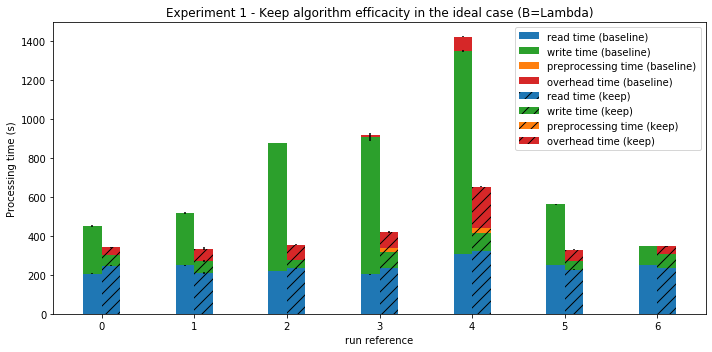

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.bar(x - width/2, baseline_means["read_time"], width, yerr=baseline_stds['read_time'], label='read time (baseline)', color=['tab:blue'])
_ = ax.bar(x - width/2, baseline_means["write_time"], width, bottom=baseline_means["read_time"], yerr=baseline_stds['write_time'], label='write time (baseline)', color=['tab:green'])
_ = ax.bar(x - width/2, baseline_means["preprocess_time"], width, bottom=baseline_prepross_bottom, yerr=baseline_stds['preprocess_time'], label='preprocessing time (baseline)', color=['tab:orange'])
_ = ax.bar(x - width/2, baseline_means["overhead"], width, bottom=baseline_overhead_bottom, yerr=baseline_stds['overhead'], label='overhead time (baseline)', color=['tab:red'])

_ = ax.bar(x + width/2, keep_means["read_time"], width, yerr=keep_stds['read_time'], label='read time (keep)', color=['tab:blue'], hatch='//')
_ = ax.bar(x + width/2, keep_means["write_time"], width, bottom=keep_means['read_time'], yerr=keep_stds['write_time'], label='write time (keep)', color=['tab:green'], hatch='//')
_ = ax.bar(x + width/2, keep_means["preprocess_time"], width, bottom=keep_prepross_bottom, yerr=keep_stds['preprocess_time'], label='preprocessing time (keep)', color=['tab:orange'], hatch='//')
_ = ax.bar(x + width/2, keep_means["overhead"], width, bottom=keep_overhead_bottom, yerr=keep_stds['overhead'], label='overhead time (keep)', color=['tab:red'], hatch='//')
           
ax.set_ylabel('Processing time (s)')
ax.set_xlabel('run reference')
ax.set_title('Experiment 1 - Keep algorithm efficacity in the ideal case (B=Lambda)')
ax.set_xticks(x)
ax.set_xticklabels(sorted(references))
ax.legend()

fig.tight_layout()
plt.show()

seeks

In [27]:
df_seeks.head()

,Unnamed: 0,case_name,run_ref,model,process_time,preprocess_time,read_time,write_time,outfile_openings,outfile_seeks,infile_openings,infile_seeks,max_voxels,success
0,0,case 1_0,0,keep,344.609428,0.046494,248.035114,51.531926,32,0,64,0,1339843750,True
1,0,case 1_2,2,keep,353.606750,0.730150,233.167324,43.201751,343,0,1000,0,5464000000,True
2,0,case 1_6,6,keep,345.300527,0.886776,237.140795,68.625658,700,0,400,0,566562500,True
3,0,case 1_6,6,keep,349.540469,0.889951,237.432919,70.203476,700,0,400,0,566562500,True
4,0,case 1_5,5,keep,331.543036,0.295608,227.910237,45.034036,196,0,400,0,5337500000,True


In [30]:
df_seeks = df_seeks.drop(columns=['Unnamed: 0', 'case_name', 'process_time', 'preprocess_time', 'read_time', 'write_time', 'max_voxels', 'success'])

In [32]:
df_keep = df_seeks.loc[df_seeks["model"]=="keep"]
df_baseline = df_seeks.loc[df_seeks["model"]=="baseline"]

In [33]:
keep_means = df_keep.groupby('run_ref').mean()
keep_stds = df_keep.groupby('run_ref').std()
baseline_means = df_baseline.groupby('run_ref').mean()
baseline_stds = df_baseline.groupby('run_ref').std()

In [34]:
keep_means.head()

,outfile_openings,outfile_seeks,infile_openings,infile_seeks
run_ref,,,,
0,32,0,64,0
1,100,0,64,0
2,343,0,1000,0
3,2744,0,1000,0
4,2744,0,8000,0


In [36]:
outseeks_bottom_k = keep_means['outfile_openings']
inops_bottom_k = keep_means['outfile_openings'] + keep_means['outfile_seeks']
inseeks_bottom_k = keep_means['outfile_openings'] + keep_means['outfile_seeks'] + keep_means['infile_openings']

outseeks_bottom_b = baseline_means['outfile_openings']
inops_bottom_b = baseline_means['outfile_openings'] + baseline_means['outfile_seeks']
inseeks_bottom_b = baseline_means['outfile_openings'] + baseline_means['outfile_seeks'] + baseline_means['infile_openings']

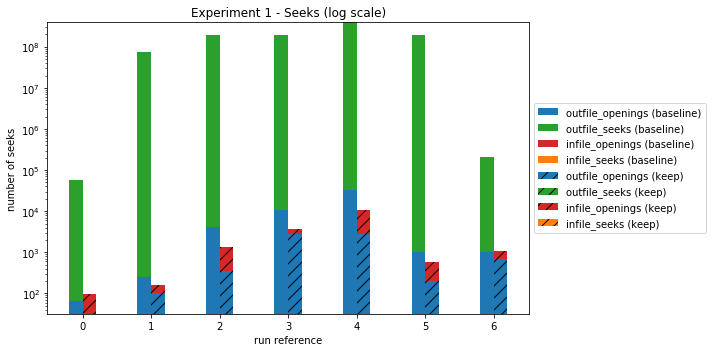

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
_ = ax.bar(x - width/2, baseline_means['outfile_openings'], width, yerr=baseline_stds['outfile_openings'], label='outfile_openings (baseline)', color=['tab:blue'])
_ = ax.bar(x - width/2, baseline_means['outfile_seeks'], width, bottom=outseeks_bottom_b, yerr=baseline_stds['outfile_seeks'], label='outfile_seeks (baseline)', color=['tab:green'])
_ = ax.bar(x - width/2, baseline_means['infile_openings'], width, bottom=inops_bottom_b, yerr=baseline_stds['infile_openings'], label='infile_openings (baseline)', color=['tab:red'])
_ = ax.bar(x - width/2, baseline_means['infile_seeks'], width, bottom=inseeks_bottom_b, yerr=baseline_stds['infile_seeks'], label='infile_seeks (baseline)', color=['tab:orange'])

_ = ax.bar(x + width/2, keep_means['outfile_openings'], width, yerr=keep_stds['outfile_openings'], label='outfile_openings (keep)', color=['tab:blue'], hatch='//')
_ = ax.bar(x + width/2, keep_means['outfile_seeks'], width, bottom=outseeks_bottom_k, yerr=keep_stds['outfile_seeks'], label='outfile_seeks (keep)', color=['tab:green'], hatch='//')
_ = ax.bar(x + width/2, keep_means['infile_openings'], width, bottom=inops_bottom_k, yerr=keep_stds['infile_openings'], label='infile_openings (keep)', color=['tab:red'], hatch='//')
_ = ax.bar(x + width/2, keep_means['infile_seeks'], width, bottom=inseeks_bottom_k, yerr=keep_stds['infile_seeks'], label='infile_seeks (keep)', color=['tab:orange'], hatch='//')

plt.yscale('log')

ax.set_ylabel('number of seeks')
ax.set_xlabel('run reference')
ax.set_title('Experiment 1 - Seeks (log scale)')
ax.set_xticks(x)
ax.set_xticklabels(sorted(references))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()